In [ ]:
!pip install pandas seaborn matplotlib textblob


**Load Data Set**

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Love_Analysis_Large_Dataset.csv to Love_Analysis_Large_Dataset.csv


**Load & Basic Cleaning**

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("Love_Analysis_Large_Dataset.csv")

# Convert date columns
df['Relationship_Start_Date'] = pd.to_datetime(df['Relationship_Start_Date'])
df['Relationship_End_Date'] = pd.to_datetime(df['Relationship_End_Date'])

# Example: calculate relationship duration days (numeric)
df['Duration_Days'] = (df['Relationship_End_Date'] - df['Relationship_Start_Date']).dt.days

# Fill missing text fields if any
df.fillna("", inplace=True)

print(df.head())


   Person_ID     Name  Age      Gender Sexual_Orientation     Era  \
0          1    April   23  Non-binary           Bisexual    Past   
1          2  Lindsey   31       Other       Heterosexual  Modern   
2          3  Rebecca   34  Non-binary         Homosexual  Modern   
3          4  Bradley   19      Female           Bisexual    Past   
4          5  Michael   24        Male          Pansexual    Past   

  Relationship_Start_Date Relationship_End_Date Relationship_Duration  \
0              2016-09-11            2018-07-28              685 days   
1              2006-05-19            2007-11-13              543 days   
2              2010-01-04            2010-10-06              275 days   
3              2023-05-01            2025-09-17              870 days   
4              2015-04-06            2016-08-19              501 days   

  Relationship_Type  ... Places_Visited_Together Anniversary_Celebrated  \
0         Long-term  ...                       9                    Yes

**Analyze Top Reasons For BreakUp**

Top Breakup Reasons:
 Breakup_Reason
Different life goals        79
Infatuation fade            74
Moved away                  72
Mental health problems      71
Arguments and fights        70
Emotional unavailability    70
Lack of communication       68
Career priorities           68
Loss of feelings            68
Mismatch of values          67
Family disapproval          67
Jealousy                    66
Long distance strain        66
Third-party interference    63
Addiction issues            60
Trust issues                58
Ghosting                    57
Financial problems          56
Name: count, dtype: int64


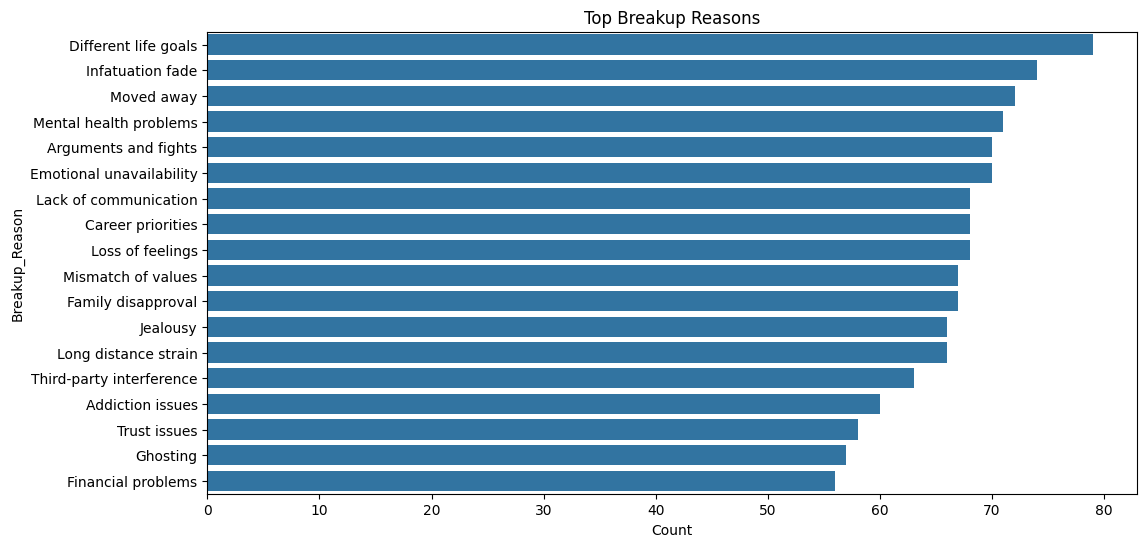

In [ ]:
# Count breakup reasons frequency
breakup_counts = df['Breakup_Reason'].value_counts()

print("Top Breakup Reasons:\n", breakup_counts)

# Optional: plot breakup reasons
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x=breakup_counts.values, y=breakup_counts.index)
plt.title("Top Breakup Reasons")
plt.xlabel("Count")
plt.show()


**Sentiment Analysis On Texts**

In [ ]:
from textblob import TextBlob

# Sentiment polarity for First_Message
df['First_Message_Sentiment'] = df['First_Message'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Sentiment polarity for Last_Text_Exchanged
df['Last_Text_Sentiment'] = df['Last_Text_Exchanged'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

print(df[['First_Message', 'First_Message_Sentiment']].head())
print(df[['Last_Text_Exchanged', 'Last_Text_Sentiment']].head())


                                       First_Message  First_Message_Sentiment
0  Effort them table budget memory fall city loss...                 0.000000
1  Defense dog event source seven above message w...                -0.091429
2  Field organization voice take between seven ex...                 0.000000
3  Own actually place half television still clear...                 0.004167
4  Religious quite great investment mission indee...                 0.133333
                                 Last_Text_Exchanged  Last_Text_Sentiment
0             Happen lose listen per rich attention.             0.375000
1  My system figure only us positive feeling up c...             0.113636
2  Guy building act each must foreign what far li...            -0.008333
3  Address be cause owner cup himself north perfo...             0.136364
4   Happen letter nearly resource good finish trial.             0.400000


**Emotion / Mood Disturbances**

Mood Before:
 Mood_Before
Shy            141
Resigned       133
Excited        125
Bitter         123
Calm           122
Heartbroken    118
Joyful         114
Hopeful        112
Confident      106
Numb           106
Name: count, dtype: int64
Mood During:
 Mood_During
Bitter         134
Excited        128
Resigned       127
Hopeful        125
Shy            120
Joyful         116
Calm           115
Heartbroken    114
Confident      114
Numb           107
Name: count, dtype: int64
Mood After:
 Mood_After
Hopeful        147
Bitter         138
Numb           129
Calm           127
Excited        120
Resigned       116
Heartbroken    114
Shy            110
Joyful         101
Confident       98
Name: count, dtype: int64


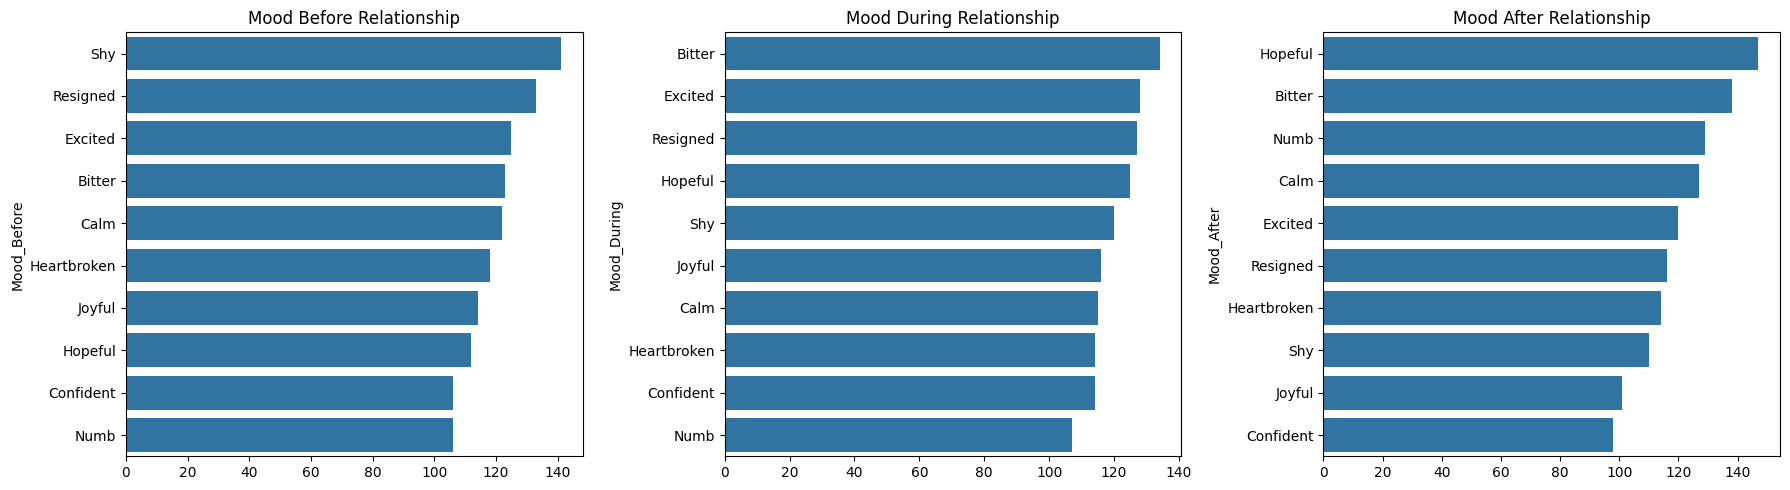

In [ ]:
# Mood counts before, during, after
mood_before = df['Mood_Before'].value_counts()
mood_during = df['Mood_During'].value_counts()
mood_after = df['Mood_After'].value_counts()

print("Mood Before:\n", mood_before)
print("Mood During:\n", mood_during)
print("Mood After:\n", mood_after)

# Visualize moods
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(y=mood_before.index, x=mood_before.values)
plt.title("Mood Before Relationship")

plt.subplot(1,3,2)
sns.barplot(y=mood_during.index, x=mood_during.values)
plt.title("Mood During Relationship")

plt.subplot(1,3,3)
sns.barplot(y=mood_after.index, x=mood_after.values)
plt.title("Mood After Relationship")

plt.tight_layout()
plt.show()


**Correlation Between Scores**

Correlation Matrix:
                             Trust_Score  Emotional_Dependency_Score  \
Trust_Score                    1.000000                   -0.049361   
Emotional_Dependency_Score    -0.049361                    1.000000   
Regret_Level                  -0.004146                    0.034548   
Emotional_Intensity            0.037994                    0.009032   
Compatibility_Score            0.006568                    0.021465   
Duration_Days                 -0.022572                    0.000090   

                            Regret_Level  Emotional_Intensity  \
Trust_Score                    -0.004146             0.037994   
Emotional_Dependency_Score      0.034548             0.009032   
Regret_Level                    1.000000            -0.031358   
Emotional_Intensity            -0.031358             1.000000   
Compatibility_Score             0.001121             0.000064   
Duration_Days                  -0.018518            -0.052327   

                         

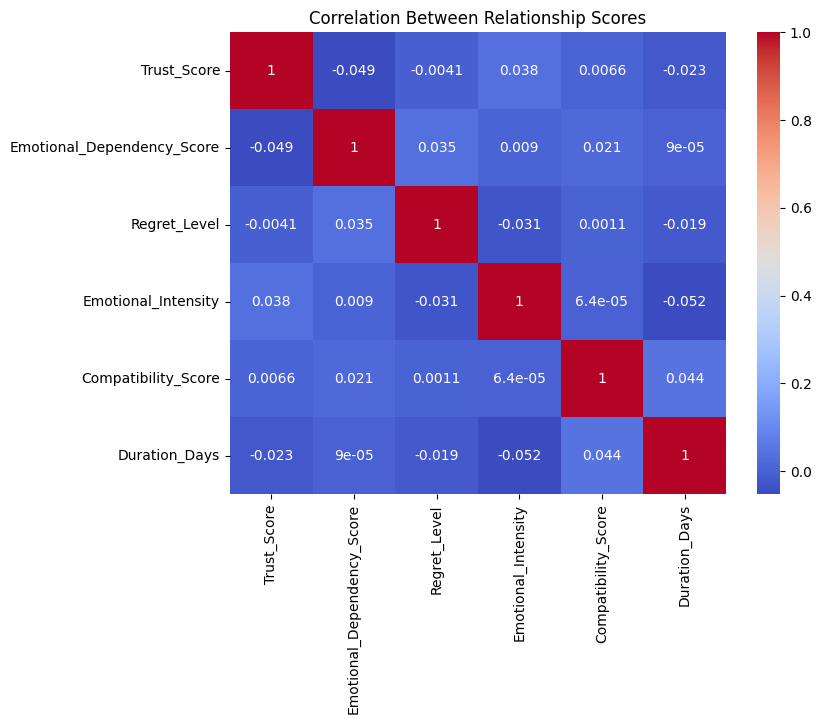

In [ ]:
# Select numeric score columns
score_cols = ['Trust_Score', 'Emotional_Dependency_Score', 'Regret_Level', 'Emotional_Intensity', 'Compatibility_Score', 'Duration_Days']

corr = df[score_cols].corr()
print("Correlation Matrix:\n", corr)

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Relationship Scores")
plt.show()


**Mood Transition Counts**

In [ ]:
# Group by mood transitions counts
transitions = df.groupby(['Mood_Before', 'Mood_During', 'Mood_After']).size().reset_index(name='Count')
print(transitions.head(10))


  Mood_Before Mood_During   Mood_After  Count
0      Bitter      Bitter       Bitter      3
1      Bitter      Bitter      Excited      1
2      Bitter      Bitter  Heartbroken      2
3      Bitter      Bitter      Hopeful      2
4      Bitter      Bitter       Joyful      1
5      Bitter      Bitter         Numb      2
6      Bitter        Calm       Bitter      3
7      Bitter        Calm         Calm      1
8      Bitter        Calm    Confident      1
9      Bitter        Calm      Hopeful      1


**Summary Statistics**

In [ ]:
print("Average Relationship Duration (days):", df['Duration_Days'].mean())
print("Average Trust Score:", df['Trust_Score'].mean())
print("Average Regret Level:", df['Regret_Level'].mean())
print("Average Emotional Intensity:", df['Emotional_Intensity'].mean())
print("Average Compatibility Score:", df['Compatibility_Score'].mean())


Average Relationship Duration (days): 476.65166666666664
Average Trust Score: 5.495833333333334
Average Regret Level: 5.58
Average Emotional Intensity: 5.475
Average Compatibility Score: 5.504166666666666


In [ ]:
keywords = ["love", "miss", "sorry", "forever", "hate", "talk", "block", "remember", "care", "cry"]

def keyword_counts(text_series, keyword):
    return text_series.str.lower().str.count(keyword).sum()

print("🔍 Keyword Counts in First Messages:")
for kw in keywords:
    print(f"{kw}: {keyword_counts(df['First_Message'], kw)}")

print("\n🔍 Keyword Counts in Last Texts:")
for kw in keywords:
    print(f"{kw}: {keyword_counts(df['Last_Text_Exchanged'], kw)}")


🔍 Keyword Counts in First Messages:
love: 0
miss: 22
sorry: 0
forever: 0
hate: 14
talk: 13
block: 0
remember: 10
care: 16
cry: 0

🔍 Keyword Counts in Last Texts:
love: 0
miss: 29
sorry: 0
forever: 0
hate: 10
talk: 11
block: 0
remember: 9
care: 27
cry: 0


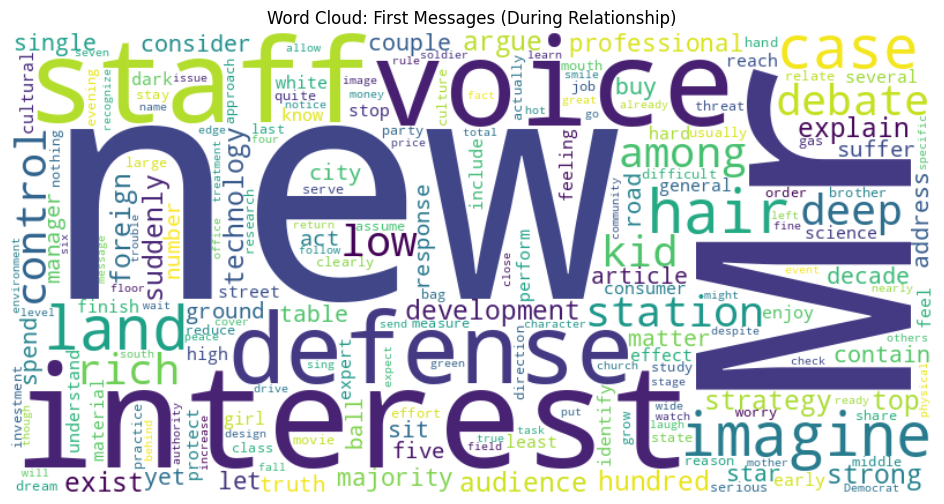

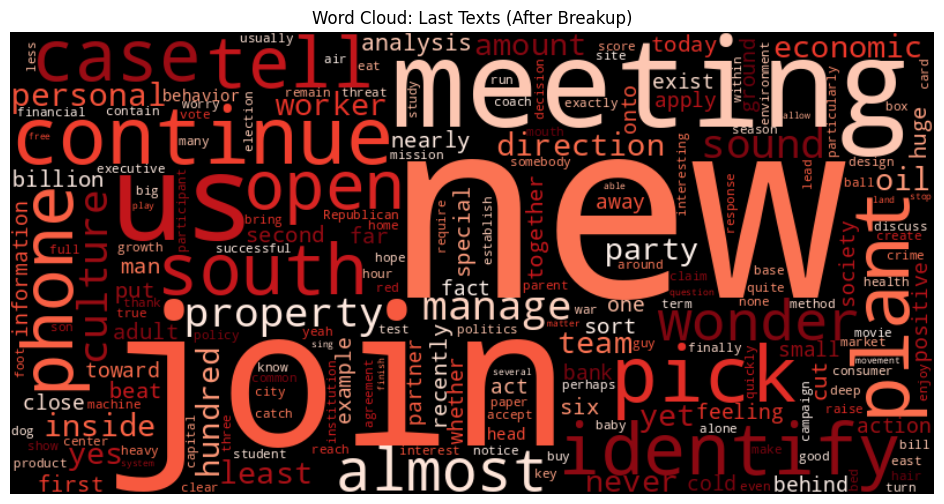

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all texts into single string
all_first_msgs = ' '.join(df['First_Message'].dropna().astype(str).tolist())
all_last_msgs = ' '.join(df['Last_Text_Exchanged'].dropna().astype(str).tolist())

# Word cloud for First Messages
plt.figure(figsize=(12,6))
wordcloud1 = WordCloud(width=800, height=400, background_color='white').generate(all_first_msgs)
plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud: First Messages (During Relationship)")
plt.show()

# Word cloud for Last Texts
plt.figure(figsize=(12,6))
wordcloud2 = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(all_last_msgs)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud: Last Texts (After Breakup)")
plt.show()


**Love Growth Pattern**

In [ ]:
df.groupby('Love_Growth_Trend')['Duration_Days'].mean().sort_values()


,Duration_Days
Love_Growth_Trend,
Decline,471.757732
Gradual,478.567430
Early spike,479.386635


**Closure vs Regret**

In [ ]:
df.groupby('Closure_Given')['Regret_Level'].mean()


,Regret_Level
Closure_Given,
No,5.603589
Yes,5.555366


**Modern vs Past Era**

# **SQL ANALYSIS**

In [ ]:
import sqlite3
import pandas as pd

# Load the dataset
df = pd.read_csv("Love_Analysis_Large_Dataset.csv")

conn = sqlite3.connect("love_analysis.db")
df.to_sql("relationships", conn, if_exists='replace', index=False)


1200

In [ ]:
query = "SELECT * FROM relationships LIMIT 5"
pd.read_sql_query(query, conn)


,Person_ID,Name,Age,Gender,Sexual_Orientation,Era,Relationship_Start_Date,Relationship_End_Date,Relationship_Duration,Relationship_Type,...,Photos_Shared_Count,Places_Visited_Together,Anniversary_Celebrated,Memory_Value_Score,Love_Growth_Trend,Attachment_Style,Breakup_Recovery_Days,Communication_Style,Emotional_Intensity,Compatibility_Score
0,1,April,23,Non-binary,Bisexual,Past,2016-09-11,2018-07-28,685 days,Long-term,...,25,9,Yes,2,Early spike,Secure,102,Passive,7,4
1,2,Lindsey,31,Other,Heterosexual,Modern,2006-05-19,2007-11-13,543 days,Casual,...,17,0,Yes,4,Early spike,Secure,180,Passive,1,7
2,3,Rebecca,34,Non-binary,Homosexual,Modern,2010-01-04,2010-10-06,275 days,Flings,...,4,20,Yes,9,Early spike,Anxious,173,Passive,9,4
3,4,Bradley,19,Female,Bisexual,Past,2023-05-01,2025-09-17,870 days,Long-term,...,74,1,No,9,Early spike,Avoidant,177,Passive,8,4
4,5,Michael,24,Male,Pansexual,Past,2015-04-06,2016-08-19,501 days,Casual,...,85,14,Yes,3,Early spike,Avoidant,124,Avoidant,4,4


In [ ]:
query = """
SELECT Breakup_Reason, COUNT(*) AS Count
FROM relationships
GROUP BY Breakup_Reason
ORDER BY Count DESC;
"""

pd.read_sql_query(query, conn)


,Breakup_Reason,Count
0,Different life goals,79
1,Infatuation fade,74
2,Moved away,72
3,Mental health problems,71
4,Emotional unavailability,70
5,Arguments and fights,70
6,Loss of feelings,68
7,Lack of communication,68
8,Career priorities,68
9,Mismatch of values,67


**Average Compatibility By Relationship Type**





In [ ]:
query = """
SELECT Relationship_Type, AVG(Compatibility_Score) AS Avg_Compatibility
FROM relationships
GROUP BY Relationship_Type
ORDER BY Avg_Compatibility DESC;

"""

pd.read_sql_query(query, conn)


,Relationship_Type,Avg_Compatibility
0,Flings,5.573222
1,Long-term,5.522124
2,Long-distance,5.517857
3,Situationship,5.474074
4,Casual,5.439834


**Regret Level By Gender**

In [ ]:
query = """
SELECT Gender, AVG(Regret_Level) AS Avg_Regret
FROM relationships
GROUP BY Gender;


"""

pd.read_sql_query(query, conn)


,Gender,Avg_Regret
0,Female,5.632509
1,Male,5.453642
2,Non-binary,5.612583
3,Other,5.623003


**Emotional Dependency By Attachment Style**

In [ ]:
query = """
SELECT Attachment_Style, AVG(Emotional_Dependency_Score) AS Avg_Dependency
FROM relationships
GROUP BY Attachment_Style
ORDER BY Avg_Dependency DESC;


"""

pd.read_sql_query(query, conn)


,Attachment_Style,Avg_Dependency
0,Avoidant,5.559896
1,Secure,5.496296
2,Anxious,5.464720


**Rebound Speed After Breakup**

In [ ]:
query = """
SELECT AVG(Rebound_After_Days) AS Avg_Rebound_Days
FROM relationships;

"""

pd.read_sql_query(query, conn)


,Avg_Rebound_Days
0,89.0125


**Most Common Fights**

In [ ]:
query = """
SELECT First_Fight_Topic as Common_Fights, COUNT(*) AS Count
FROM relationships
GROUP BY First_Fight_Topic
ORDER BY Count DESC
LIMIT 10;

"""

pd.read_sql_query(query, conn)


,Common_Fights,Count
0,Time management,136
1,Priorities,130
2,Communication,129
3,Career,124
4,Money,120
5,Trust,118
6,Future plans,117
7,Social media use,116
8,Jealousy,114
9,Family interference,96
